In [9]:
# Compares level 2 data with airplane location data
#
# Author: Brian Pitzel
# Date Created: 3 October 2024
# Date Modified: 17 October 2024

import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import glob
import traffic
from traffic.data import opensky

%matplotlib inline


In [10]:

SMALL_SIZE = 30 #38
MEDIUM_SIZE = 35 #42
BIGGER_SIZE = 50 #56

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig_width_inches = 17
fig_height_inches = 10

In [37]:
# get the aircraft data
bounds = (-109.375, 50.771, -106.0, 52.765) # west, south, east, north

# get the level 2 files
y = 2024
m = 7
d = 2
level2_files = [
        f'/mnt/NAS/airplane-data/L2/{y}_{m:02d}_{d:02d}/ib3d_normal_swht_{y}_{m:02d}_{d:02d}_prelate_bakker.h5'
        ]
#level2_files = glob.glob(f'/mnt/NAS/airplane-data/L2/*/ib3d_normal_swht_20*.h5')
# descriptor for this run
descriptor = 'Airplane' #'No corrections on antennas 5 and 6'

# set up vectorized timestamp converter
vutcfromtimestamp = np.vectorize(datetime.datetime.utcfromtimestamp)

# time interval of interest
t_start = [2023,12,13,0,15,0]
t_end   = [2023,12,13,0,18,0]

t_start = [y,m,d,0,0,0]
t_end   = [y,m,d,23,59,59]

start_time = datetime.datetime(t_start[0], t_start[1], t_start[2], t_start[3], t_start[4], t_start[5])
end_time = datetime.datetime(t_end[0], t_end[1], t_end[2], t_end[3], t_end[4], t_end[5])

/mnt/NAS/airplane-data/L2/2024_07_02/ib3d_normal_swht_2024_07_02_prelate_bakker.h5


FINISHED: : 100% [00:00, 328%/s] 
DOWNLOAD: 7.00lines [00:00, 1.44klines/s]
FINISHED: : 100% [00:00, 490%/s]
DOWNLOAD: 10.0lines [00:00, 2.19klines/s]
FINISHED: : 100% [00:00, 489%/s]
DOWNLOAD: 2.00lines [00:00, 443lines/s]
FINISHED: : 95.0% [00:00, 311%/s]
DOWNLOAD: 6.00lines [00:00, 1.33klines/s]
FINISHED: : 94.7% [00:00, 155%/s]
DOWNLOAD: 7.00lines [00:00, 1.56klines/s]
FINISHED: : 0.00% [00:00, ?%/s]
DOWNLOAD: 6.00lines [00:00, 1.31klines/s]
0.00% [00:00, ?%/s]
DOWNLOAD: 0.00lines [00:00, ?lines/s]
0.00% [00:00, ?%/s]
DOWNLOAD: 1.00lines [00:00, 224lines/s]
FINISHED: : 100% [00:00, 197%/s]
DOWNLOAD: 24.0lines [00:00, 3.62klines/s]
0.00% [00:00, ?%/s]
DOWNLOAD: 0.00lines [00:00, ?lines/s]
FINISHED: : 0.00% [00:00, ?%/s]
DOWNLOAD: 52.0lines [00:00, 10.7klines/s]
FINISHED: : 100% [00:00, 304%/s]
DOWNLOAD: 510lines [00:00, 77.8klines/s]
FINISHED: : 96.6% [00:00, 119%/s]
DOWNLOAD: 130lines [00:00, 25.8klines/s]
FINISHED: : 100% [00:00, 328%/s] 
DOWNLOAD: 156lines [00:00, 30.4klines/s]
F

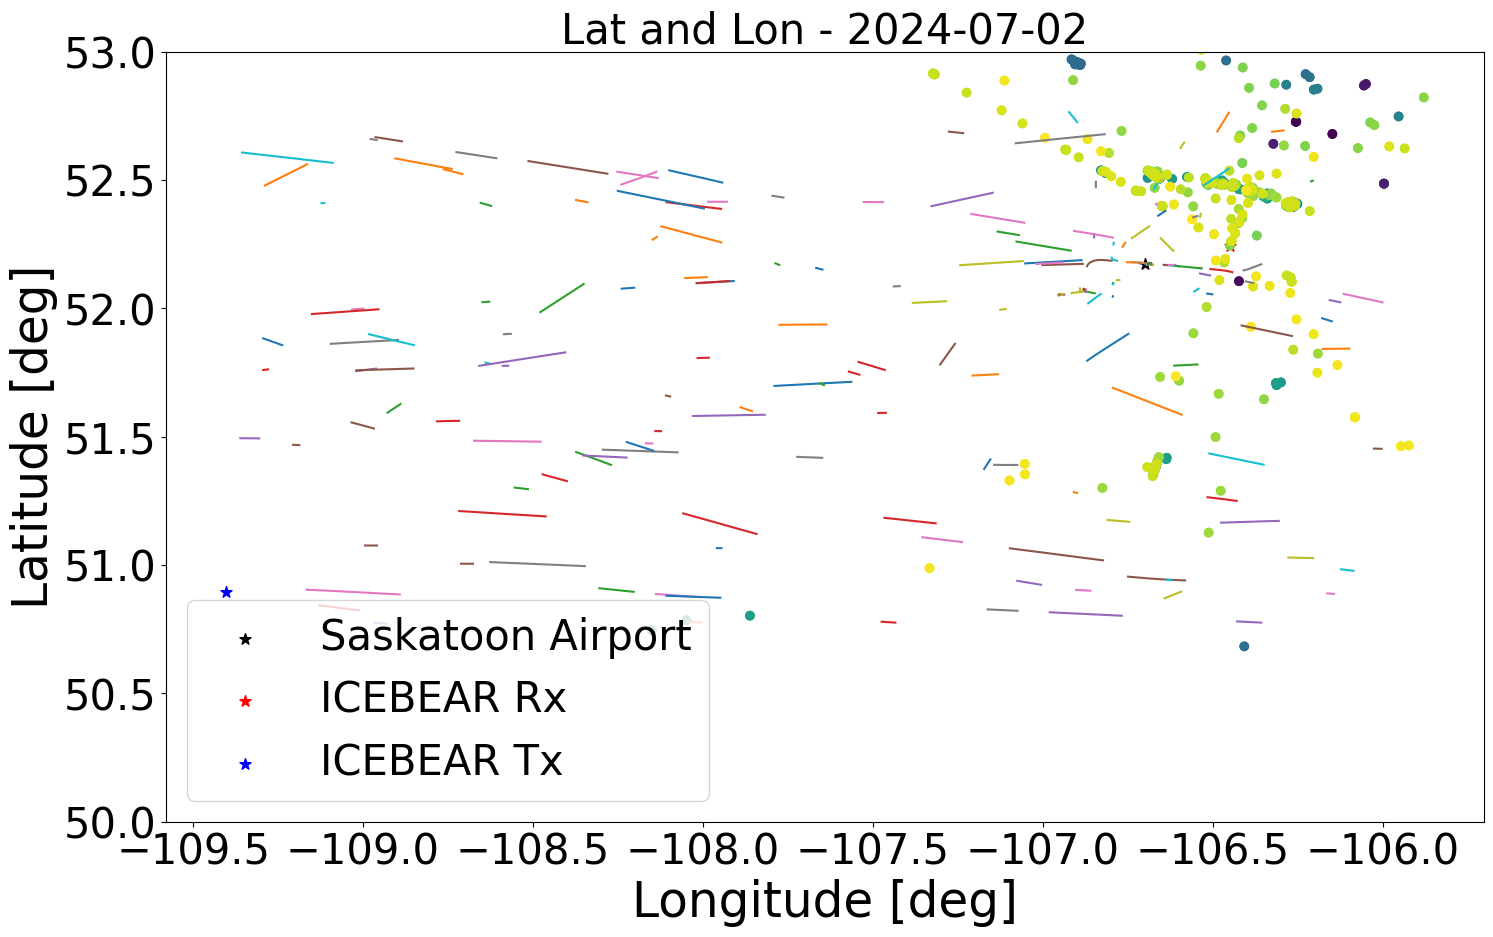

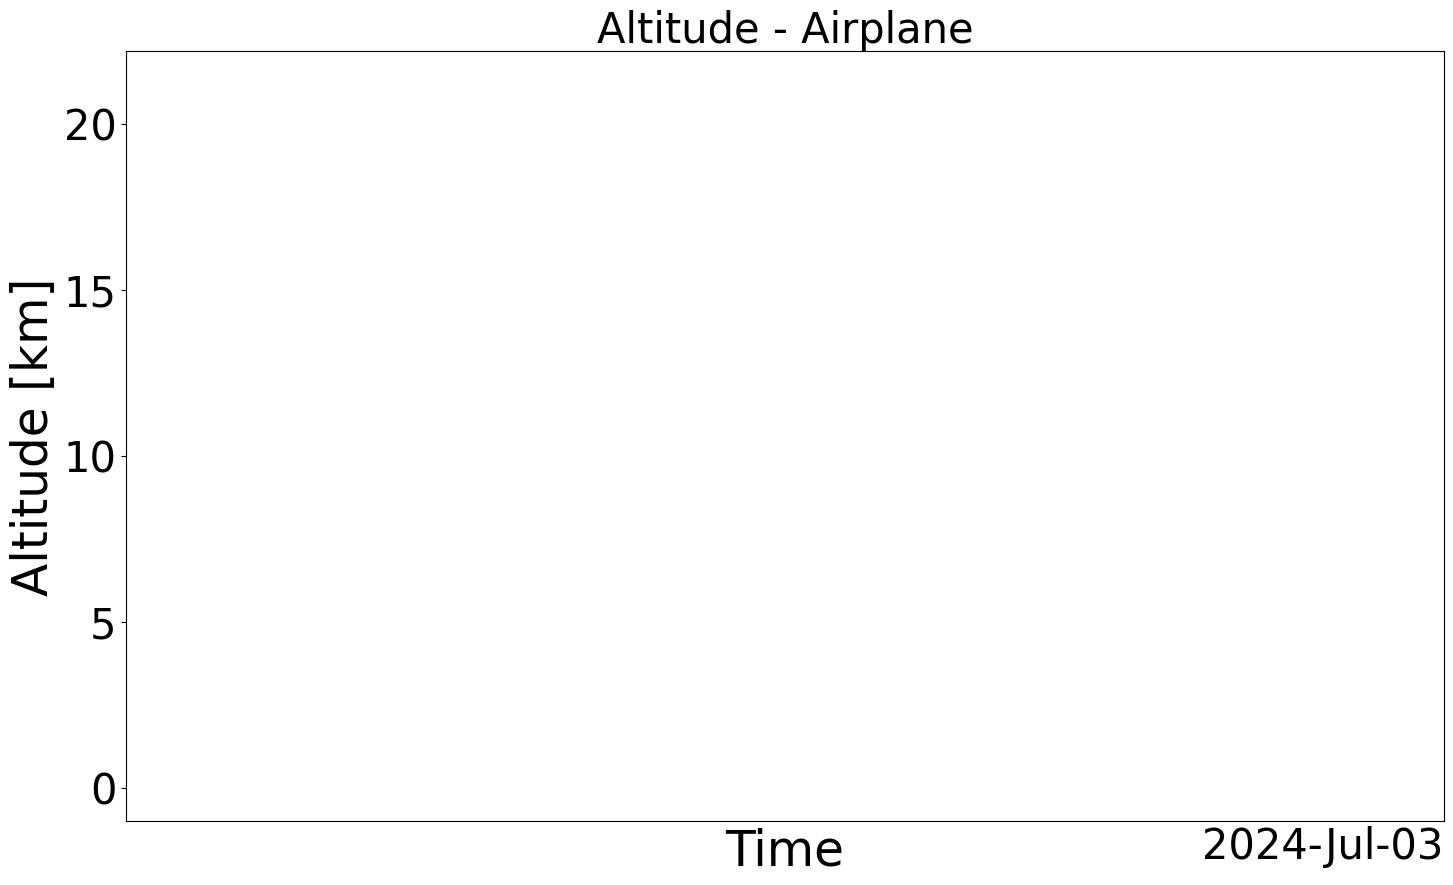

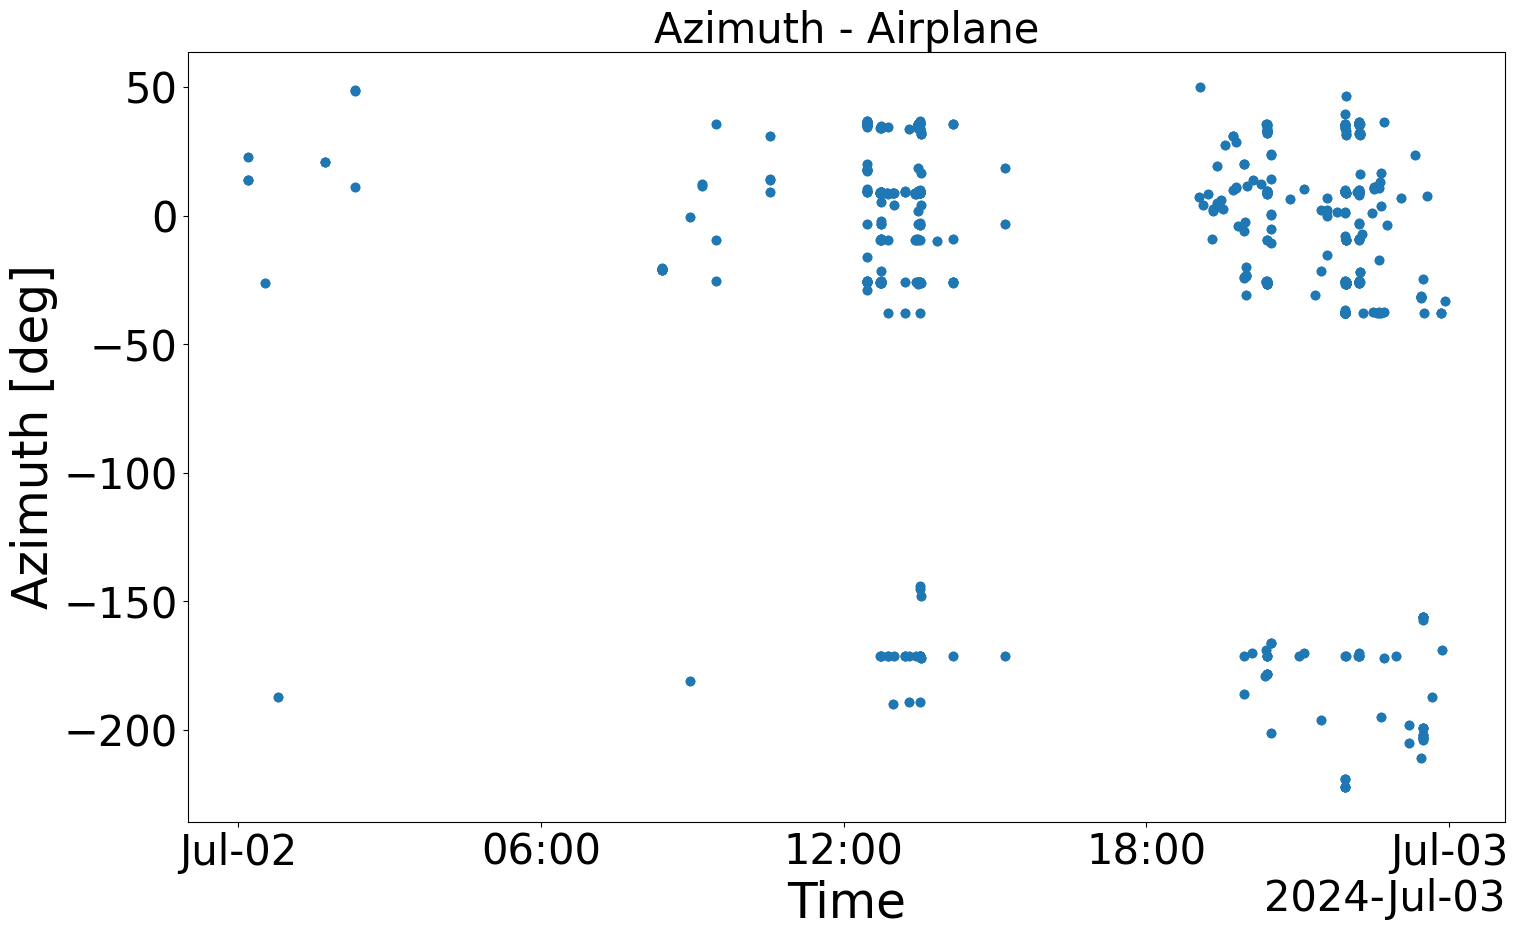

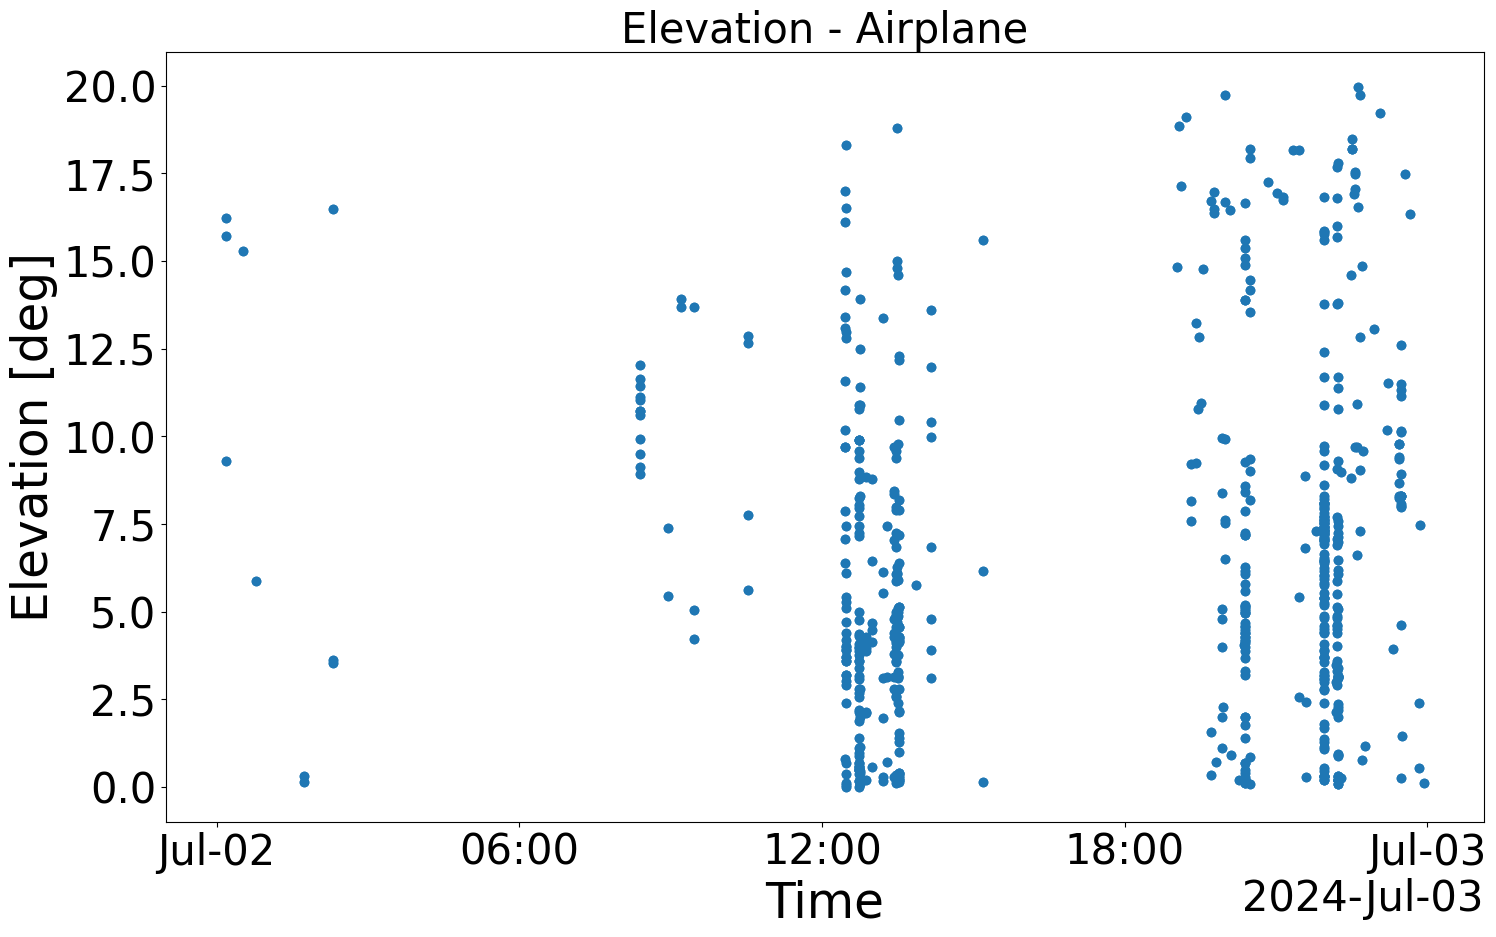

In [38]:
# set up axes
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)

fig_ll, ax_ll = plt.subplots()
fig_ll.set_size_inches(fig_width_inches, fig_height_inches)
ax_ll.set_ylabel('Latitude [deg]')
ax_ll.set_ylim([50, 53])
ax_ll.set_xlabel('Longitude [deg]')
ax_ll.set_title(f'Lat and Lon - {start_time.strftime("%Y-%m-%d")}' )
stoon_airport = [52.17145, -106.70039]
icebear_rx = [52.24393, -106.45025]
icebear_tx = [50.89335, -109.40317]
ax_ll.scatter(stoon_airport[1], stoon_airport[0], marker='*', c='black', s=70)
ax_ll.scatter(icebear_rx[1], icebear_rx[0], marker='*', c='r', s=70)
ax_ll.scatter(icebear_tx[1], icebear_tx[0], marker='*', c='b', s=70)
ax_ll.legend(['Saskatoon Airport','ICEBEAR Rx','ICEBEAR Tx'])

fig_alt, ax_alt = plt.subplots()
fig_alt.set_size_inches(fig_width_inches, fig_height_inches)
ax_alt.set_ylabel('Altitude [km]')
ax_alt.set_xlabel('Time')
ax_alt.set_xlim([0, 15])
ax_alt.set_title(f'Altitude - {descriptor}')
ax_alt.xaxis.set_major_locator(locator)
ax_alt.xaxis.set_major_formatter(formatter)

fig_az, ax_az = plt.subplots()
fig_az.set_size_inches(fig_width_inches, fig_height_inches)
ax_az.set_ylabel('Azimuth [deg]')
ax_az.set_xlabel('Time')
ax_az.set_title(f'Azimuth - {descriptor}')
ax_az.xaxis.set_major_locator(locator)
ax_az.xaxis.set_major_formatter(formatter)

fig_el, ax_el = plt.subplots()
fig_el.set_size_inches(fig_width_inches, fig_height_inches)
ax_el.set_ylabel('Elevation [deg]')
ax_el.set_xlabel('Time')
ax_el.set_title(f'Elevation - {descriptor}')
ax_el.xaxis.set_major_locator(locator)
ax_el.xaxis.set_major_formatter(formatter)

for file in level2_files:
    print(file)
    f = h5py.File(file)
    altitude = f['data']['altitude'][:]
    azimuth = f['data']['azimuth'][:]
    doppler_shift = f['data']['doppler_shift'][:]
    elevation = f['data']['elevation'][:]
    latitude = f['data']['latitude'][:]
    longitude = f['data']['longitude'][:]
    rf_distance = f['data']['rf_distance'][:]
    slant_range = f['data']['slant_range'][:]
    snr_db = f['data']['snr_db'][:]
    time = f['data']['time'][:]
    utc_time = vutcfromtimestamp(time)
    time_filter = (utc_time < end_time) & (utc_time > start_time) 
    elevation_filter = elevation < 20
    altitude_filter = altitude < 20
    range_filter = rf_distance < 400
    time_filter = time_filter & range_filter & elevation_filter & altitude_filter


    # plot lat/lon
    ax_ll.scatter(longitude[time_filter], latitude[time_filter], c=time[time_filter])
    
    # plot alt/time
    ax_alt.scatter(utc_time[time_filter], altitude[time_filter])#, c=snr_db[time_filter])
    
    # plot az and el / time
    ax_az.scatter(utc_time[time_filter], azimuth[time_filter])
    ax_el.scatter(utc_time[time_filter], elevation[time_filter])
            
    airplane_start = utc_time[time_filter][0]
    aircrafts_dbs = []
    for j in range(utc_time[time_filter].shape[0] - 1):
        this_timestamp = utc_time[time_filter][j]
        next_timestamp = utc_time[time_filter][j+1]
        if next_timestamp - this_timestamp >= datetime.timedelta(minutes=1): # if we are going to move onto another airplane
            airplane_end = this_timestamp
            
            # get aircraft data for the airplane timeframe
            aircrafts_db = opensky.history(
                                airplane_start,
                                airplane_end,
                                bounds=bounds)
            aircrafts_dbs.append(aircrafts_db)

            airplane_start = next_timestamp


# plot

# aircraft tracks
for aircrafts_db in aircrafts_dbs:
    try:
        for i in range(len(aircrafts_db)):
            ax_ll.plot(aircrafts_db[i].data.longitude, aircrafts_db[i].data.latitude)
            ax_alt.scatter(aircrafts_db[i].data.timestamp, aircrafts_db[i].data.altitude / 3.281 / 1000)
    except:
        continue


plt.show()

In [6]:
aircrafts_dbs[0][0].data

,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,spi,squawk,altitude,geoaltitude,last_position,serials,hour
140,2022-12-13 00:00:17+00:00,406a9c,52.310936,-108.630772,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889616.514,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
141,2022-12-13 00:00:18+00:00,406a9c,52.309353,-108.633519,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889617.494,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
142,2022-12-13 00:00:19+00:00,406a9c,52.307119,-108.637364,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42275.0,1670889618.912,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
143,2022-12-13 00:00:20+00:00,406a9c,52.306320,-108.638763,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,42975.0,42275.0,1670889619.389,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
144,2022-12-13 00:00:21+00:00,406a9c,52.303953,-108.642857,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889620.938,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
145,2022-12-13 00:00:22+00:00,406a9c,52.303348,-108.643956,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889621.367,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
146,2022-12-13 00:00:23+00:00,406a9c,52.300644,-108.648682,502.0,226.774794,-64.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889622.963,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
147,2022-12-13 00:00:24+00:00,406a9c,52.299042,-108.651428,502.0,226.774794,-64.0,BAW26PV,False,False,False,5617,42975.0,42300.0,1670889623.988,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
148,2022-12-13 00:00:25+00:00,406a9c,52.297760,-108.653641,502.0,226.774794,0.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889624.892,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00
149,2022-12-13 00:00:26+00:00,406a9c,52.296158,-108.656387,502.0,226.774794,-64.0,BAW26PV,False,False,False,5617,43000.0,42300.0,1670889625.847,"[-1408232174, -1408231276, -1408237456]",2022-12-13 00:00:00+00:00


Using matplotlib backend: inline
2022-12-13 00:00:17
2022-12-13 23:58:31
(4341,)
